In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
# 对爬取的数据进行基本的处理，如去重、去空、值转换等
comment_type = {5.0: 1, 4.5: 1, 4.0: 1, 3.5: 1, 3.0: 0,
                2.5: 0, 2.0: 0, 1.5: 0, 1.0: 0, 0.5: 0, 0.0: 0}

comments = pd.read_csv("../data/datasets/maoyan_data/comments.txt",
                       sep="####", engine='python')  # 读取数据，以####作为分割，使用python作为读取引擎

origin_size=len(comments)
# 进行去重操作，根据评论一列的数据进行去重，在原数据上进行修改
comments.drop_duplicates('评论', keep='first', inplace=True)
comments.dropna(inplace=True)  # 去除可能的空值
comments['评分'] = comments['评分'].apply(
    lambda x: comment_type[x])  # 将评分体系归类为好评、中评和差评体系
print(f"去重前数据:{origin_size},去重后数据:{len(comments)}")

去重前数据:62100,去重后数据:55244


In [16]:
# 划分数据集，将数据集划分为训练集、开发集和测试集，比例为8:1:1

# 获取构建、训练和测试模型所需的X,Y
y = comments['评分']
X = comments['评论']

# 数据集划分
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, shuffle=True)
X_test, X_dev, y_test, y_dev = train_test_split(
    X_temp, y_temp, test_size=0.5, shuffle=True)

# 将划分好的数据集保存至文件
pd.concat([y_train, X_train], axis=1).to_csv(
    "../data/datasets/final_data/train.txt", index=False, sep="\t")  # 将训练集保存到文件
pd.concat([y_dev, X_dev], axis=1).to_csv(
    "../data/datasets/final_data/dev.txt", index=False, sep="\t")  # 将开发集保存到文件
pd.concat([y_test, X_test], axis=1).to_csv(
    "../data/datasets/final_data/test.txt", index=False, sep="\t")  # 将测试机保存到文件

print("数据集划分完成，数据已保存到项目目录下的data/comments/model_data文件夹内")
# 显示各数据集大小
print(f"训练集大小:{len(X_train)}")
print(f"开发集大小:{len(X_dev)}")
print(f"测试集大小:{len(X_test)}")


数据集划分完成，数据已保存到项目目录下的data/comments/model_data文件夹内
训练集大小:44195
开发集大小:5525
测试集大小:5524


In [22]:
# 对评论内容进行进一步处理，统计词频，以及获取生成词云的字符串
import re
import jieba
# 停用词设置，此处采用的是哈工大的停用词表
stop_words=[i.strip() for i in open("../data/others/hit_stopwords.txt","r",encoding="utf-8").readlines()] # 加载停用词
text_s="" # 用于保存生成词云的字符串
result=[] # 用于存储所有数据
vacab={} # 用于统计词频
jieba.load_userdict("../data/others/user.txt")

for text,label in zip(X,y): # 此处的X即为上一步获取的所有评论
    tmp=""
    cut_list=jieba.lcut("".join(re.findall("[\u4e00-\u9fa5a-zA-Z0-9]",text))) # 只取汉字、英文字母和数字，\u4e00-\u9fa5为unicode表中所有汉字，获取后用jieba进行全模式分词
    for word in cut_list: # 遍历分出的词，统计词频
        if word not in stop_words:
            vacab[word]=vacab.get(word,0)+1
            tmp+=" "+word
            text_s+=" "+word
    result.append({'label':label,"text":tmp})

data=pd.DataFrame(data=result) # 由数据构建一个DataFrame，为了更好的写入文件
data.to_csv("../data/datasets/final_data/all_data.txt",sep="\t",index=False)# 将句子分词后写入文件中

In [ ]:
# 根据统计的词频创建词表
vacab=list(vacab.items())
vacab=sorted(vacab,key=lambda x:x[1],reverse=True) # 按照词频对词进行排序，词频大的在前
with open("../data/datasets/others/vocab.txt","w+",encoding="utf-8") as f:
    for word,_ in vacab:
        f.write(word+"\n")

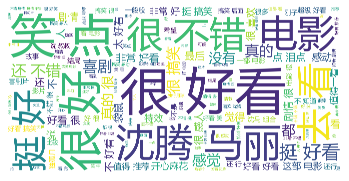

In [25]:
# 根据所有评论中的词绘制词云
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    background_color="white",  # 背景颜色
    font_path='msyh.ttc',  # 调用font里的simsun.tff字体，需要提前安装
    scale=32,             # 清晰度
    random_state=1000,    # 设置随机生成状态，即有多少种配色方案
)

myword = wc.generate(text_s)  # 用 wl的词语 生成词云
# 展示词云图
plt.imshow(myword)
plt.axis("off")
plt.show()
